In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import scipy.stats as stats
import statistics as sta
from scipy.stats import norm

### **DANE**

In [2]:
dane = pd.read_csv('.\movies.csv')
dane

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
genre = dane["genre"].value_counts()
(genre / sum(genre) * 100).apply(lambda x: f"{x:0.2f} %")

genre
Comedy       29.28 %
Action       22.24 %
Drama        19.80 %
Crime         7.19 %
Biography     5.78 %
Adventure     5.57 %
Animation     4.41 %
Horror        4.20 %
Fantasy       0.57 %
Mystery       0.26 %
Thriller      0.21 %
Family        0.14 %
Sci-Fi        0.13 %
Romance       0.13 %
Western       0.04 %
Musical       0.03 %
Music         0.01 %
History       0.01 %
Sport         0.01 %
Name: count, dtype: object

In [4]:
genre['Musical'] += genre.get('Music', 0)
genre.drop('Music', inplace=True)

In [5]:
for col in dane.columns:
    pct_missing = np.mean(dane[col].isnull())
    miss = '{} - {}%'.format(col, pct_missing)
    print(miss)

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
print('\n we can see that the data have missing data lets fix it')

dane.isnull().sum()


 we can see that the data have missing data lets fix it


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
dane = dane.dropna()

In [8]:
dane.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### **WYKRESY PRZEDSTAWIAJĄCE DANE**

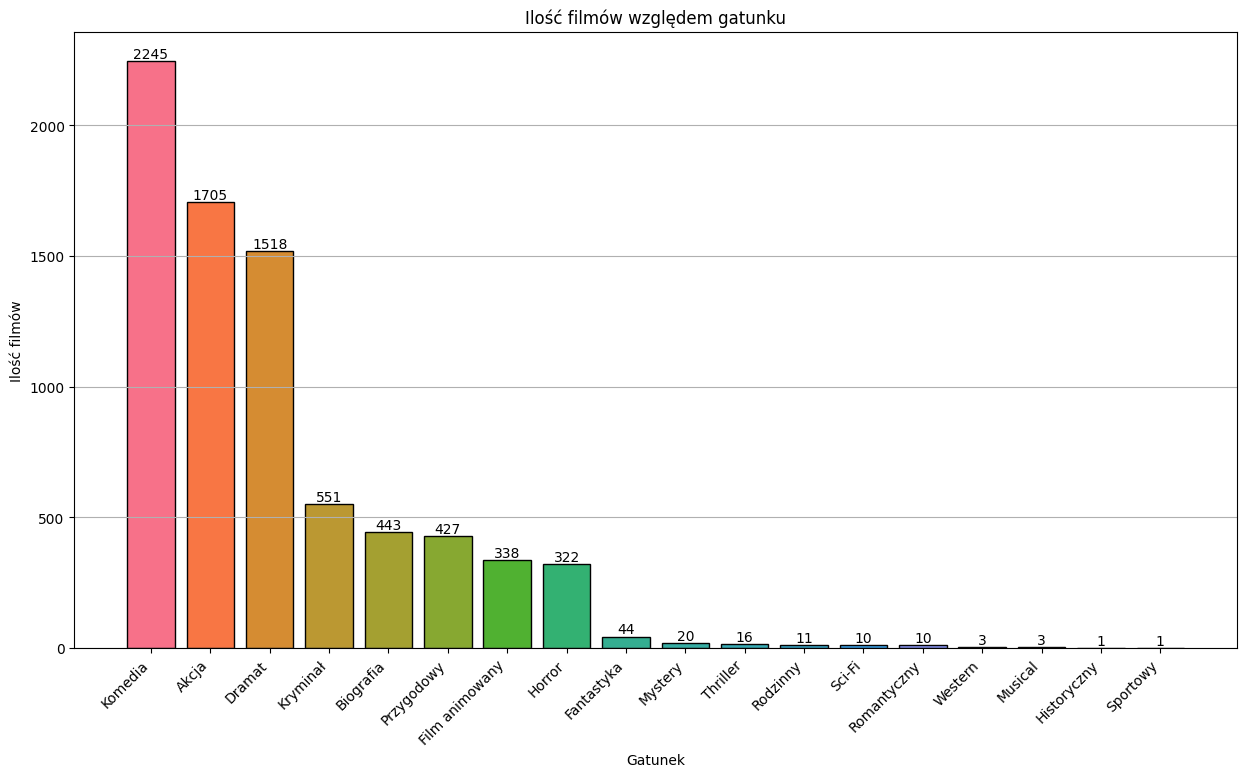

In [9]:
tlumaczenia = {
    'Comedy': 'Komedia',
    'Action': 'Akcja',
    'Drama': 'Dramat',
    'Crime': 'Kryminał',
    'Biography': 'Biografia',
    'Adventure': 'Przygodowy',
    'Animation': 'Film animowany',
    'Horror': 'Horror',
    'Fantasy': 'Fantastyka',
    'Mystery': 'Mystery',
    'Thriller': 'Thriller',
    'Family': 'Rodzinny',
    'Sci-Fi': 'Sci-Fi',
    'Romance': 'Romantyczny',
    'Western': 'Western',
    'Musical': 'Musical',
    'Music': 'Musical',
    'History': 'Historyczny',
    'Sport': 'Sportowy',
}

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in genre.index]

colors = sns.color_palette('husl', len(gatunki_pol))

plt.figure(figsize=(15, 8))
bars = plt.bar(gatunki_pol, genre, color=colors, edgecolor = 'black')
for bar, val in zip(bars, genre):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(val), ha='center', va='bottom')
plt.xlabel('Gatunek')
plt.ylabel('Ilość filmów')
plt.title('Ilość filmów względem gatunku')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [10]:
score = dane["score"]
score

0       8.4
1       5.8
2       8.7
3       7.7
4       7.3
       ... 
7648    6.6
7649    6.5
7650    5.6
7651    6.8
7652    6.8
Name: score, Length: 5421, dtype: float64

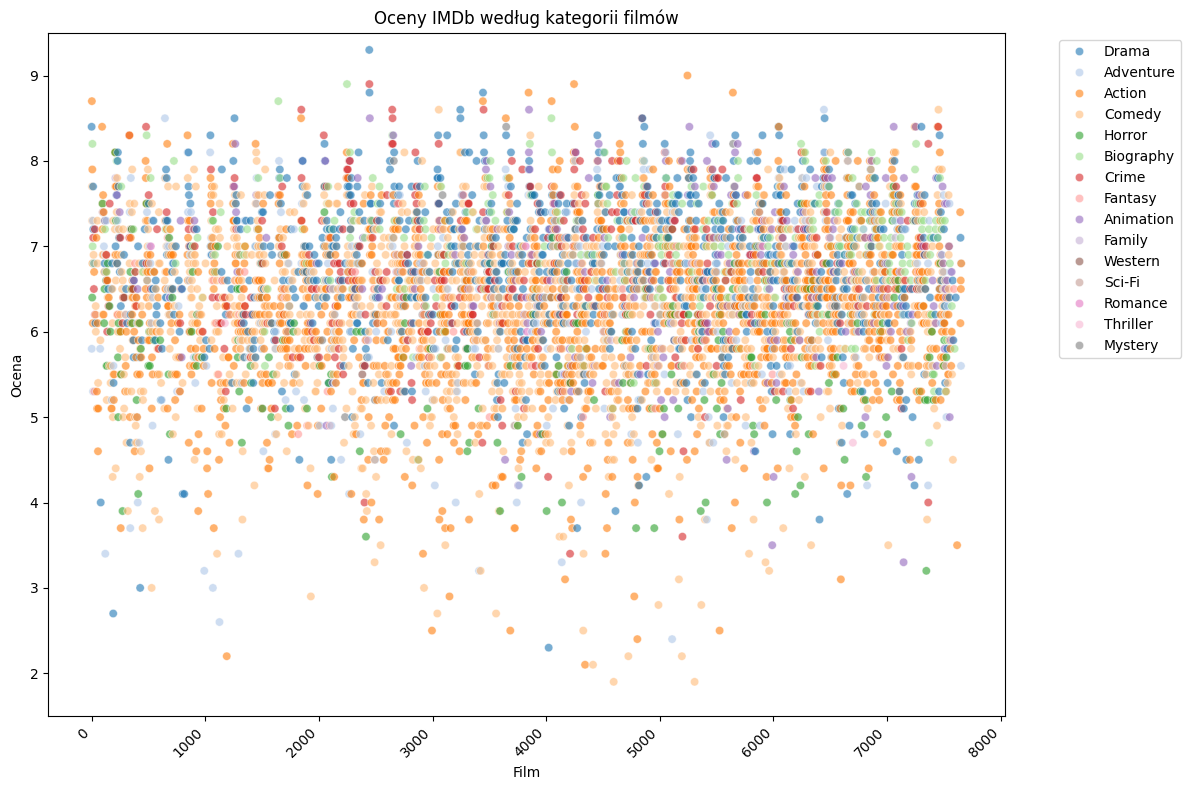

In [11]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette('tab20', len(dane['genre'].unique()))

sns.scatterplot(data=dane, x=dane.index, y='score', hue='genre', palette=colors, alpha=0.6)

plt.title('Oceny IMDb według kategorii filmów')
plt.xlabel('Film')
plt.ylabel('Ocena')

plt.xticks(rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(1.5, 9.5)

plt.tight_layout()

plt.show()

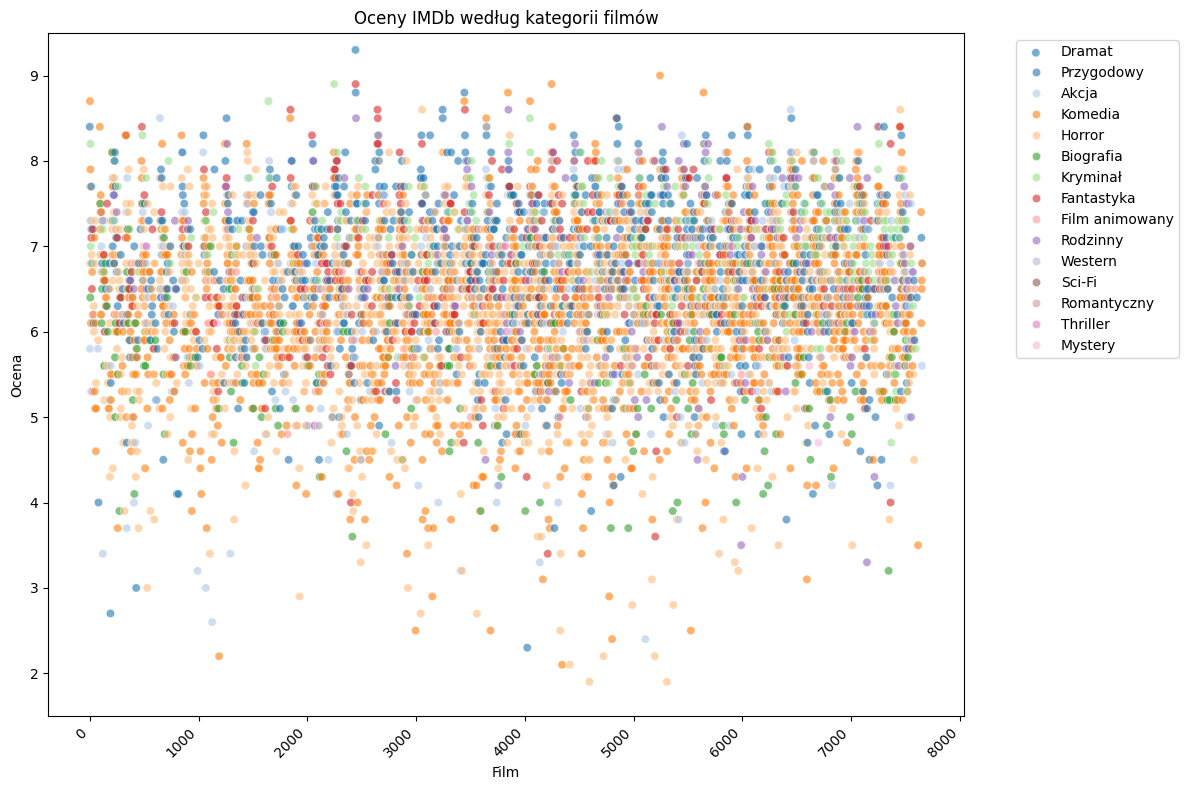

In [12]:
plt.figure(figsize=(12, 8))

labels = ["Dramat", "Przygodowy", "Akcja", "Komedia", "Horror", "Biografia", "Kryminał", "Fantastyka", "Film animowany", "Rodzinny", "Western", "Sci-Fi", "Romantyczny", "Thriller", "Mystery"]

colors = sns.color_palette('tab20', len(dane['genre'].unique()))

sns.scatterplot(data=dane, x=dane.index, y='score', hue='genre', palette=colors, alpha=0.6)

plt.title('Oceny IMDb według kategorii filmów')
plt.xlabel('Film')
plt.ylabel('Ocena')

plt.xticks(rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels = labels)

plt.ylim(1.5, 9.5)

plt.tight_layout()

plt.show()

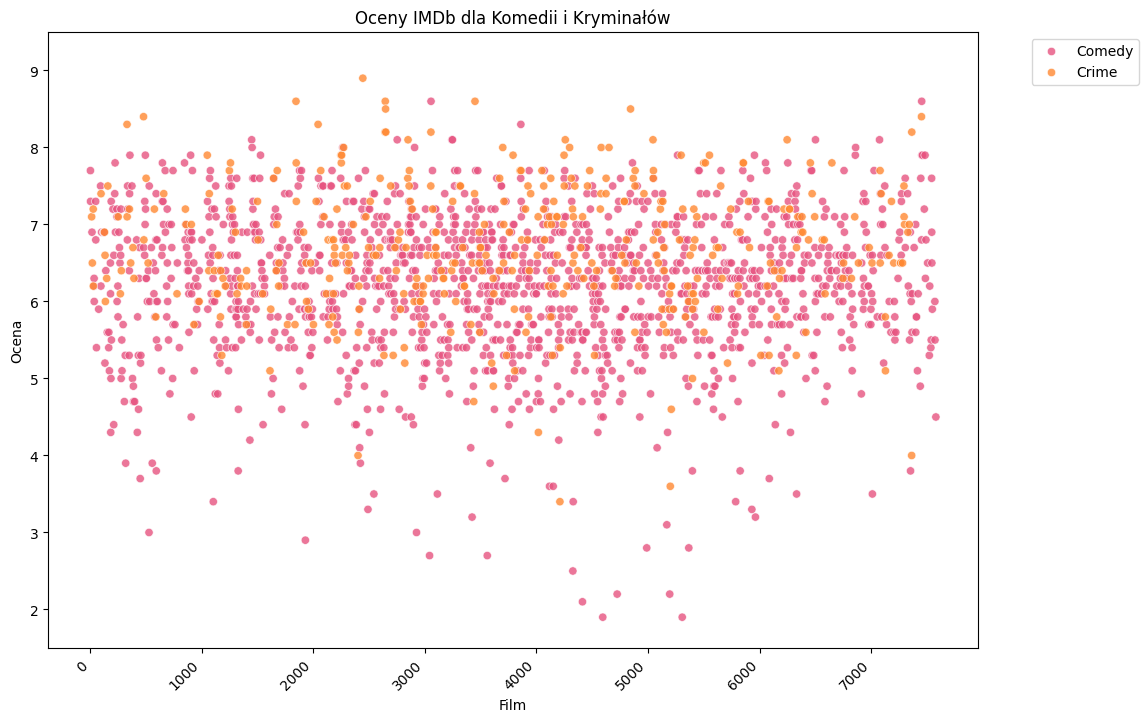

In [13]:
comedy_movies = dane[(dane['genre'] == 'Comedy') & dane['score']]
crime_movies = dane[(dane['genre'] == 'Crime') & dane['score']]

colors = ['#E75480', '#FF8932']

both = pd.concat([comedy_movies, crime_movies])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=both, x=both.index, y='score', hue='genre', alpha=0.8, palette = colors)
plt.title('Oceny IMDb dla Komedii i Kryminałów')
plt.xlabel('Film')
plt.ylabel('Ocena')
plt.xticks(rotation=45, ha='right')  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.ylim(1.5,9.5)
plt.show()

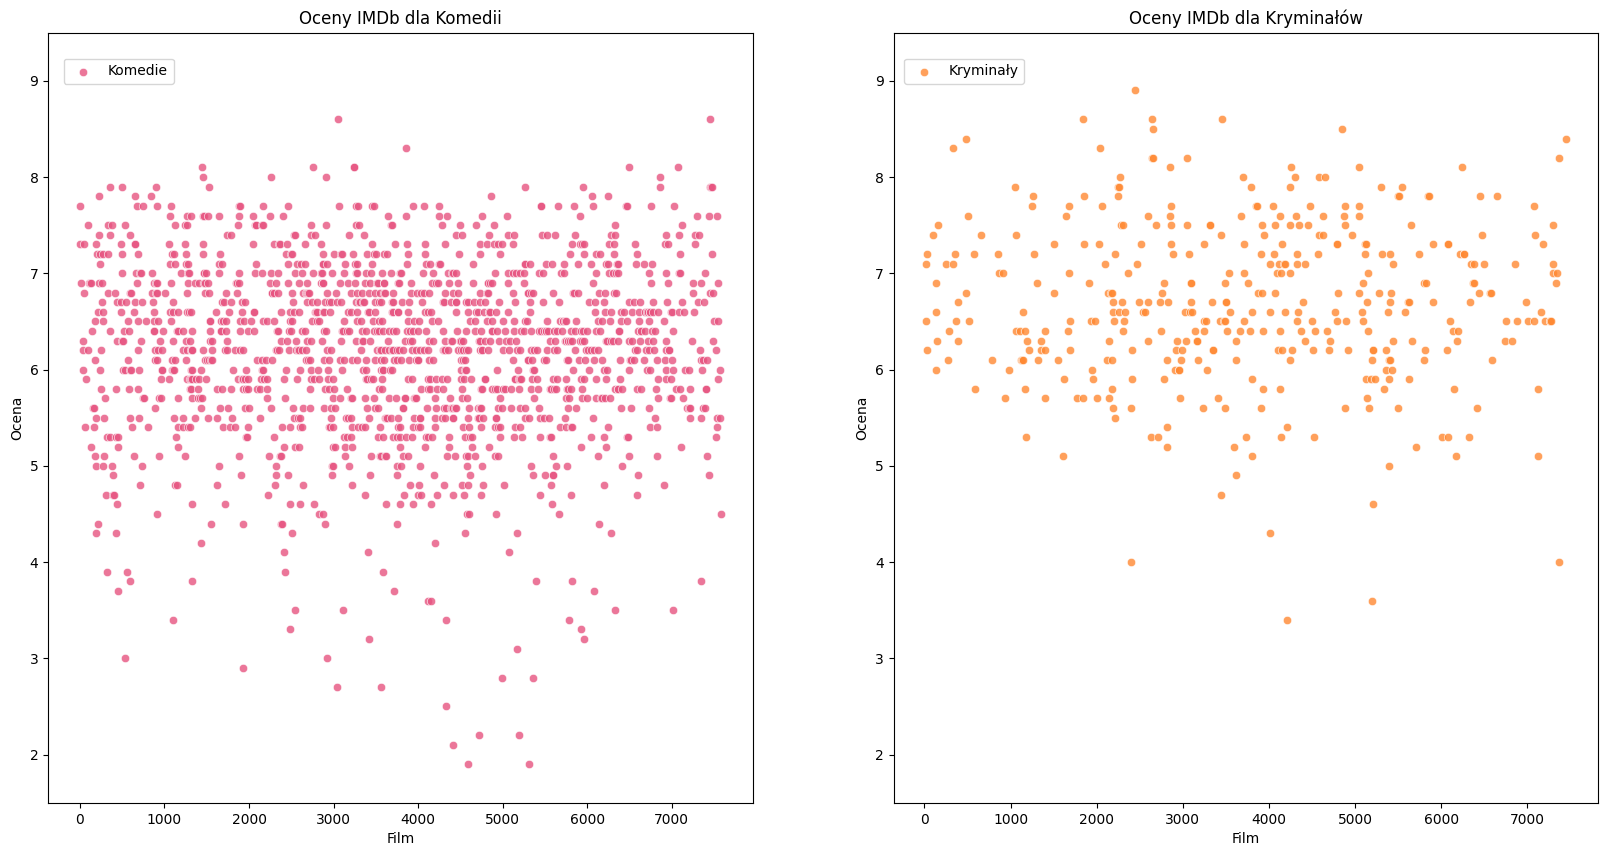

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.scatterplot(data=comedy_movies, x=comedy_movies.index, y='score', color='#E75480', alpha=0.8, label='Komedie')
plt.title('Oceny IMDb dla Komedii')
plt.xlabel('Film')
plt.ylabel('Ocena')
plt.ylim(1.5, 9.5)

plt.legend(loc='center', bbox_to_anchor=(0.1, 0.95))
plt.subplot(1, 2, 2)
sns.scatterplot(data=crime_movies, x=crime_movies.index, y='score', color='#FF8932', alpha=0.8, label='Kryminały')
plt.title('Oceny IMDb dla Kryminałów')
plt.xlabel('Film')
plt.ylabel('Ocena')
plt.ylim(1.5, 9.5)
plt.legend(loc='center', bbox_to_anchor=(0.1, 0.95))
plt.show()


## **PODSTAWOWE STATYSTYKI**

### **ŚREDNIA ARYTMETYCZNA**

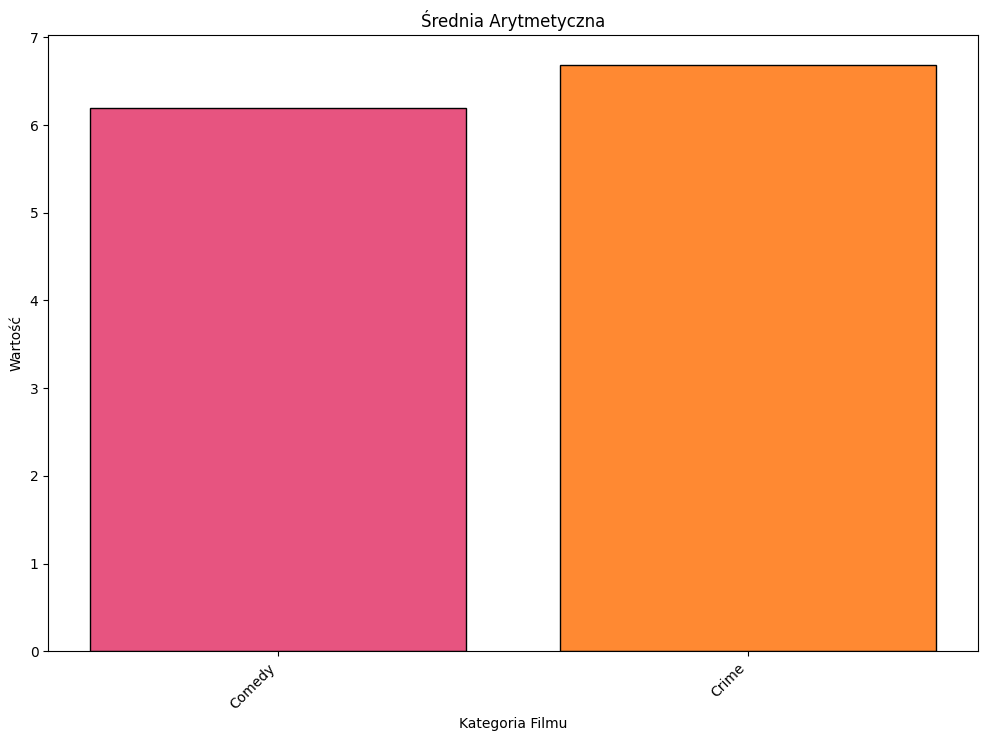

In [15]:
mean_scores_by_genre = dane.groupby('genre')['score'].mean()

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in mean_scores_by_genre.index]

selected_genres = ['Comedy', 'Crime']
mean_scores_selected_genres = mean_scores_by_genre.loc[selected_genres]

plt.figure(figsize=(12, 8))
colors = ['#E75480', '#FF8932']
bars = plt.bar(selected_genres, mean_scores_selected_genres, color=colors, edgecolor = 'black')
plt.title('Średnia Arytmetyczna')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
mean_score_comedy = dane.loc[dane['genre'] == 'Comedy', 'score'].mean()

print("Średnia ocena dla kategorii komedia:", mean_score_comedy)

Średnia ocena dla kategorii komedia: 6.190708556149732


In [18]:
mean_score_comedy = dane.loc[dane['genre'] == 'Crime', 'score'].mean()

print("Średnia ocena dla kategorii komedia:", mean_score_comedy)

Średnia ocena dla kategorii komedia: 6.68922305764411


### **ŚREDNIA HARMONICZNA**

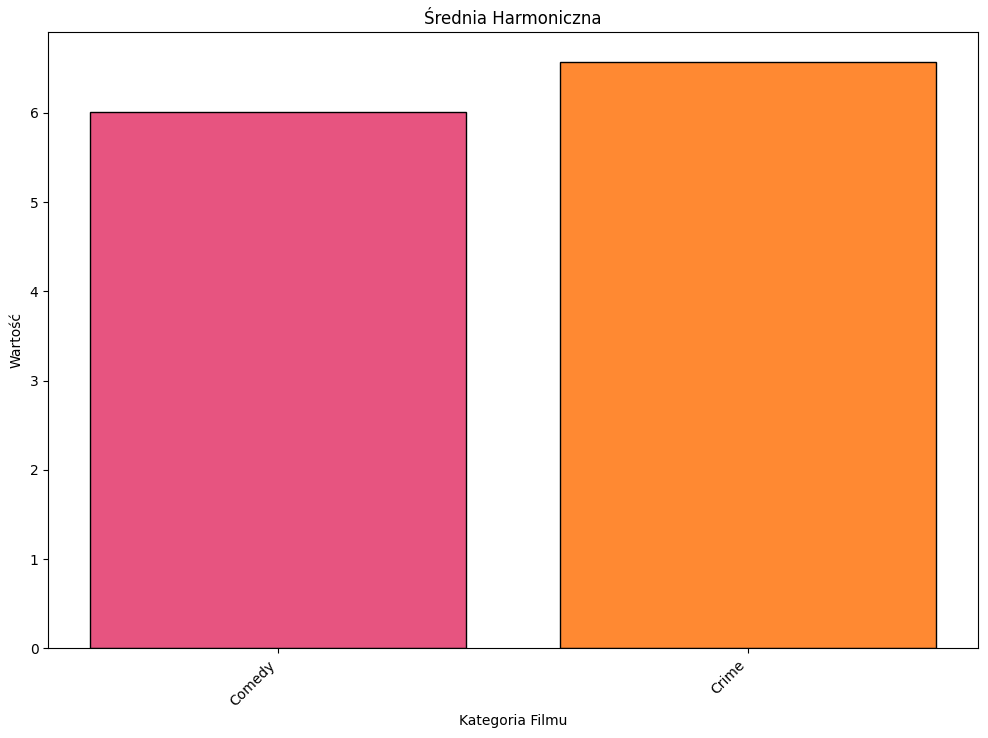

In [19]:
mean_scores_by_genre = dane.groupby('genre')['score'].agg(lambda x: stats.hmean(x))

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in mean_scores_by_genre.index]

selected_genres = ['Comedy', 'Crime']
mean_scores_selected_genres = mean_scores_by_genre.loc[selected_genres]

plt.figure(figsize=(12, 8))
colors = ['#E75480', '#FF8932']
plt.bar(selected_genres, mean_scores_selected_genres, color=colors, edgecolor = 'black')
plt.title('Średnia Harmoniczna')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [116]:
comedy_scores = dane.loc[dane['genre'] == 'Comedy', 'score']

mean_score_comedy = sta.harmonic_mean(comedy_scores)

print(mean_score_comedy)

6.008662669289681


In [119]:
crime_scores = dane.loc[dane['genre'] == 'Crime', 'score']

mean_score_crime = sta.harmonic_mean(crime_scores)

print(mean_score_crime)

6.573635737368295


### **ŚREDNIA GEOMETRYCZNA**

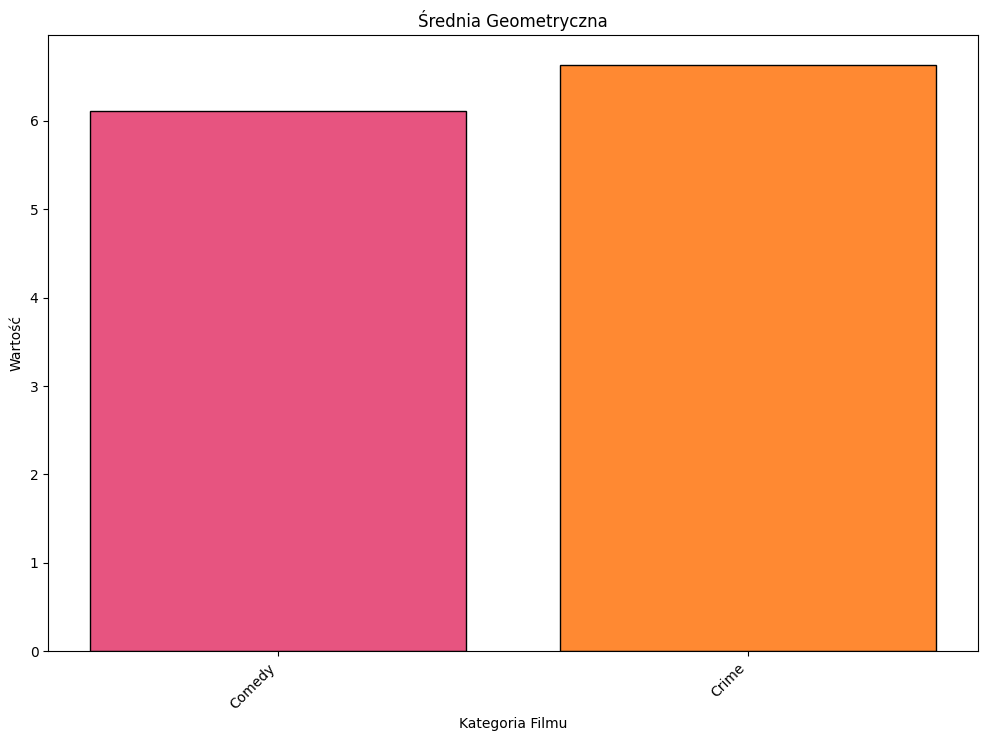

In [22]:
mean_scores_by_genre = dane.groupby('genre')['score'].agg(lambda x: stats.gmean(x))

selected_genres = ['Comedy', 'Crime']
mean_scores_selected_genres = mean_scores_by_genre.loc[selected_genres]

plt.figure(figsize=(12, 8))
colors = ['#E75480', '#FF8932']
plt.bar(selected_genres, mean_scores_selected_genres, color=colors, edgecolor = 'black')
plt.title('Średnia Geometryczna')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
comedy_scores = dane.loc[dane['genre'] == 'Comedy', 'score']

mean_score_comedy = sta.geometric_mean(comedy_scores)

print(mean_score_comedy)

6.109352226767207


In [23]:
crime_scores = dane.loc[dane['genre'] == 'Crime', 'score']

mean_score_crime = sta.geometric_mean(crime_scores)

print(mean_score_crime)

6.633743047302554


### **ŚREDNIA WINSOROWSKA**

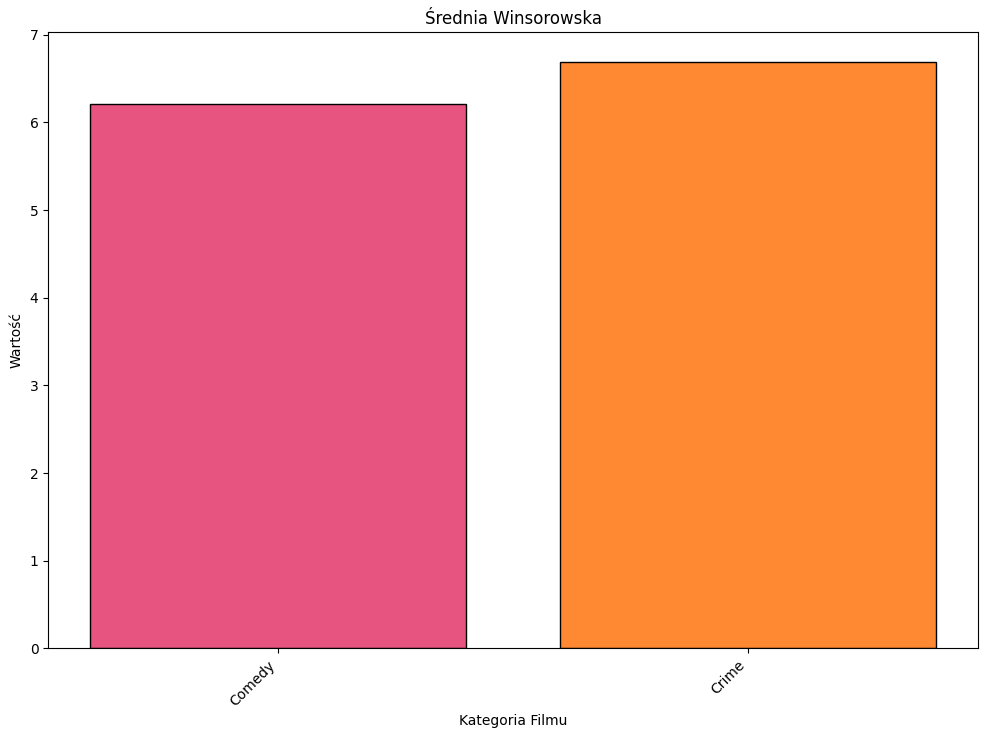

In [25]:
def winsorized_mean(data):
    k = 0.01  # Procent danych do pominięcia z każdej strony (10%)
    size = len(data)
    new_data = data.sort_values().iloc[int(k*size):int((1-k)*size)]
    return new_data.mean()

selected_genres = ['Comedy', 'Crime']
gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in mean_scores_by_genre.index]

plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, mean_scores_by_genre[selected_genres], color=palette, edgecolor = 'black')
plt.title('Średnia Winsorowska')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
comedy_scores = dane.loc[dane['genre'] == 'Comedy', 'score']

mean_score_comedy = winsorized_mean(comedy_scores)

print(mean_score_comedy)

6.205589638718472


In [27]:
crime_scores = dane.loc[dane['genre'] == 'Crime', 'score']

mean_score_crime = winsorized_mean(crime_scores)

print(mean_score_crime)

6.692091836734694


### **ŚREDNIA UCINANA**

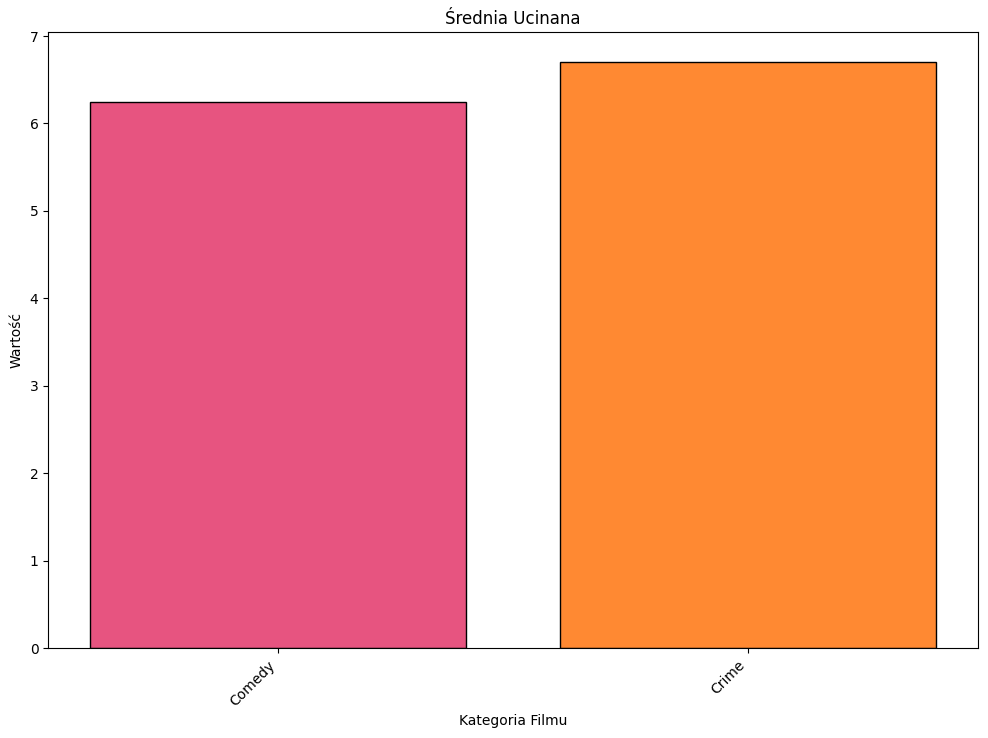

In [28]:
mean_scores_by_genre = dane.groupby('genre')['score'].agg(lambda x: stats.trim_mean(x,0.1))

selected_genres = ['Comedy', 'Crime']
gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in mean_scores_by_genre.index]
plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, mean_scores_by_genre[selected_genres], color=palette, edgecolor = 'black')
plt.title('Średnia Ucinana')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
comedy_scores = dane.loc[dane['genre'] == 'Comedy', 'score']

mean_score_comedy = stats.trim_mean(comedy_scores, 0.1)

print(mean_score_comedy)

6.246744574290484


In [30]:
crime_scores = dane.loc[dane['genre'] == 'Crime', 'score']

mean_score_crime = stats.trim_mean(crime_scores, 0.1)

print(mean_score_crime)

6.706853582554517


### **MEDIANA**

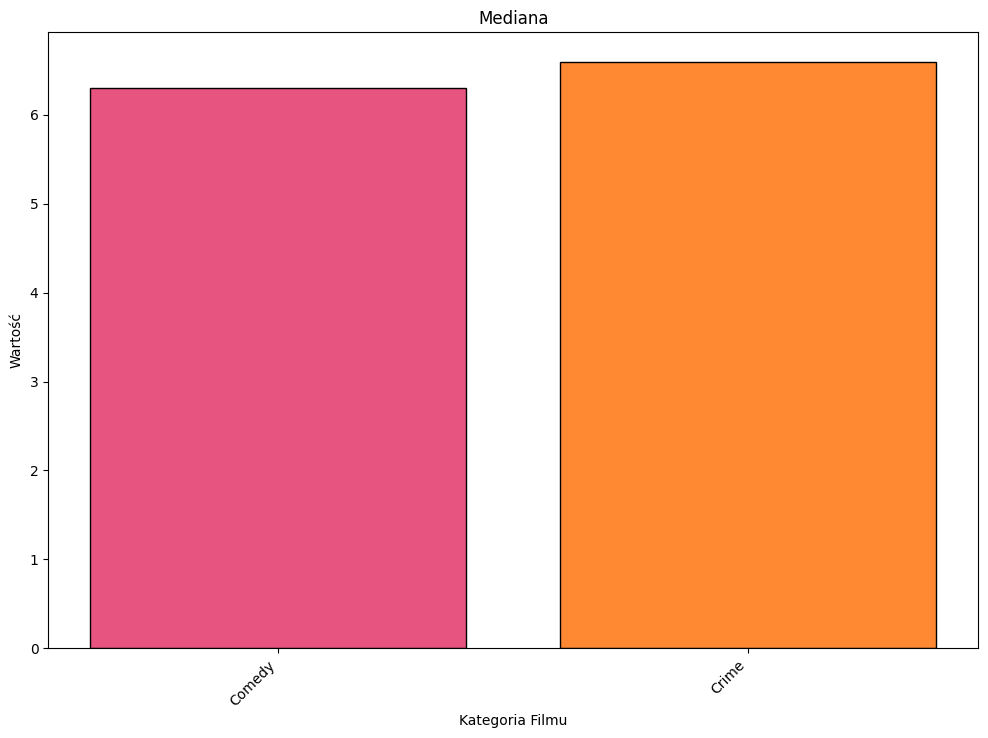

In [31]:
median_scores_by_genre = dane.groupby('genre')['score'].apply(lambda x: sta.median(x))

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in median_scores_by_genre.index]
plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, median_scores_by_genre[selected_genres], color=palette, edgecolor = 'black')
plt.title('Mediana')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:
comedy_scores = dane.loc[dane['genre'] == 'Comedy', 'score']
comedy_median = np.median(comedy_scores)
print(comedy_median)

6.3


In [20]:
crime_scores = dane.loc[dane['genre'] == 'Crime', 'score']
crime_median = np.median(crime_scores)
print(crime_median)

6.6


### **WARIANCJA**

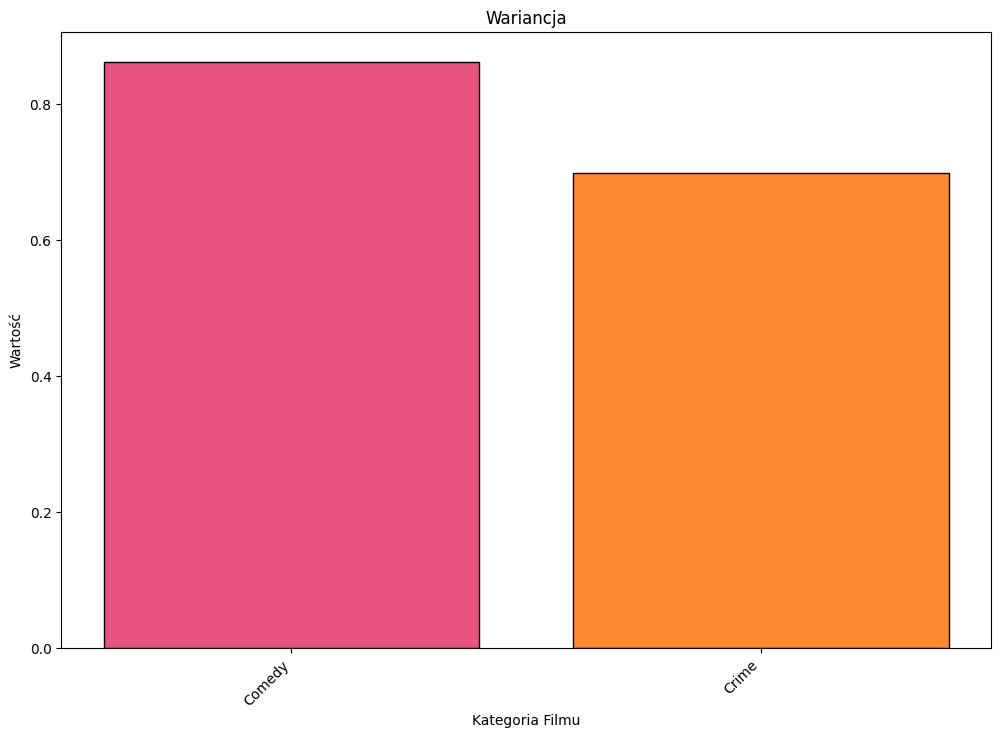

In [34]:
variance_scores_by_genre = dane.groupby('genre')['score'].apply(lambda x: np.var(x))

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in variance_scores_by_genre.index]
plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, variance_scores_by_genre[selected_genres], color=palette, edgecolor = 'black')
plt.title('Wariancja')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
variance_comedy = np.var(comedy_scores)
print(variance_comedy)

0.862901636985616


In [36]:
variance_crime = np.var(crime_scores)
print(variance_crime)

0.6985555367114529



### **ODCHYLENIE STANDARDOWE**

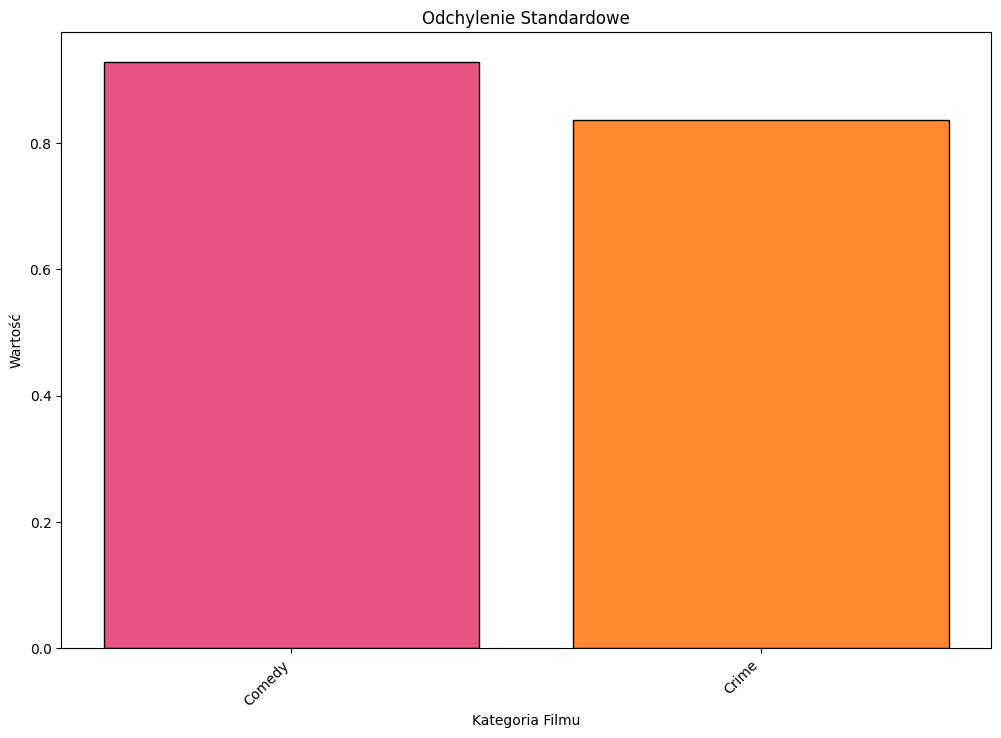

In [37]:
std_scores_by_genre = dane.groupby('genre')['score'].apply(lambda x: np.std(x))

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in std_scores_by_genre.index]
plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, std_scores_by_genre[selected_genres], color=palette, edgecolor = 'black')
plt.title('Odchylenie Standardowe')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
std_comedy = np.std(comedy_scores)
print(std_comedy)

0.9289249899672287


In [39]:
print(np.std(crime_scores))

0.8357963488263471


### **KWARTYLE**

**KWARTYL 1**

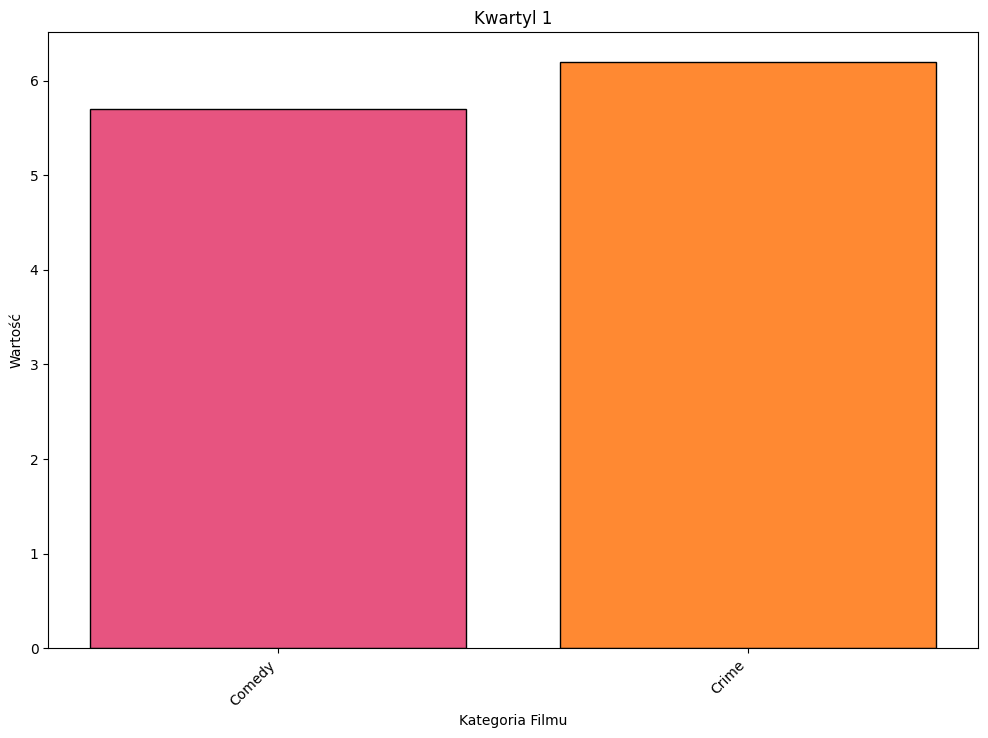

In [40]:
percentile_scores_by_genre_3 = dane.groupby('genre')['score'].apply(lambda x: np.percentile(x, 25))

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in percentile_scores_by_genre_3.index]
plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, percentile_scores_by_genre_3[selected_genres], color=palette, edgecolor = 'black')
plt.title('Kwartyl 1')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
print(np.percentile(comedy_scores,25))

5.7


In [42]:
print(np.percentile(crime_scores,25))

6.2


**KWARTYL 3**

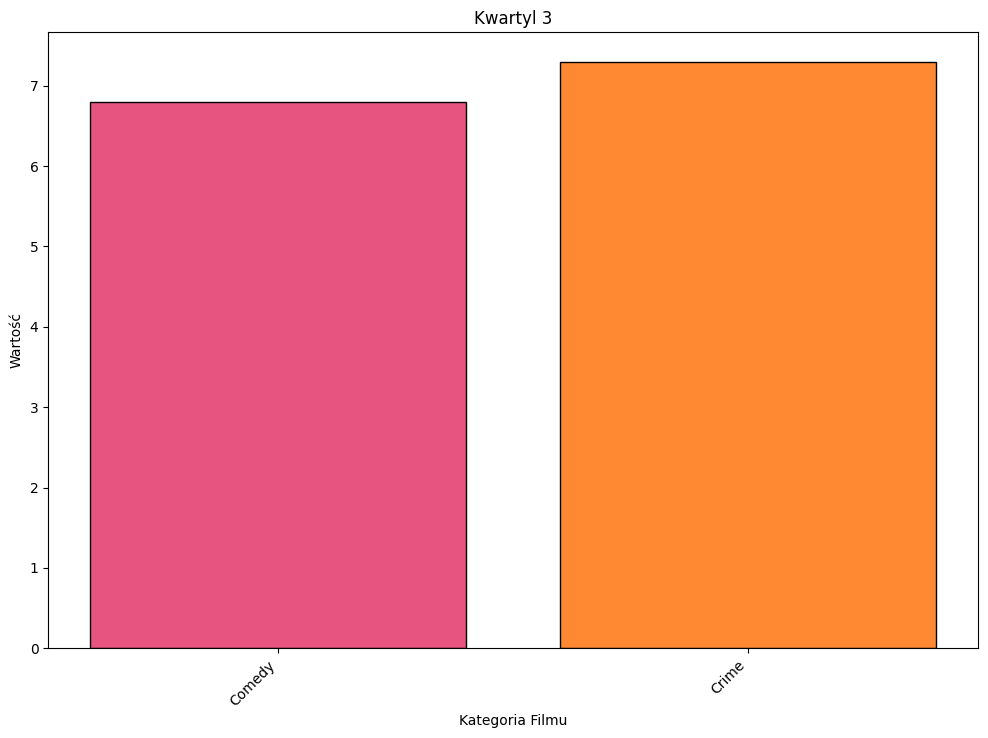

In [43]:

percentile_scores_by_genre_3 = dane.groupby('genre')['score'].apply(lambda x: np.percentile(x, 75))

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in percentile_scores_by_genre_3.index]
plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, percentile_scores_by_genre_3[selected_genres], color=palette, edgecolor = 'black')
plt.title('Kwartyl 3')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
print(np.percentile(comedy_scores,75))

6.8


In [45]:
print(np.percentile(crime_scores,75))

7.3


### **ROZSTĘP Z PRÓBY**

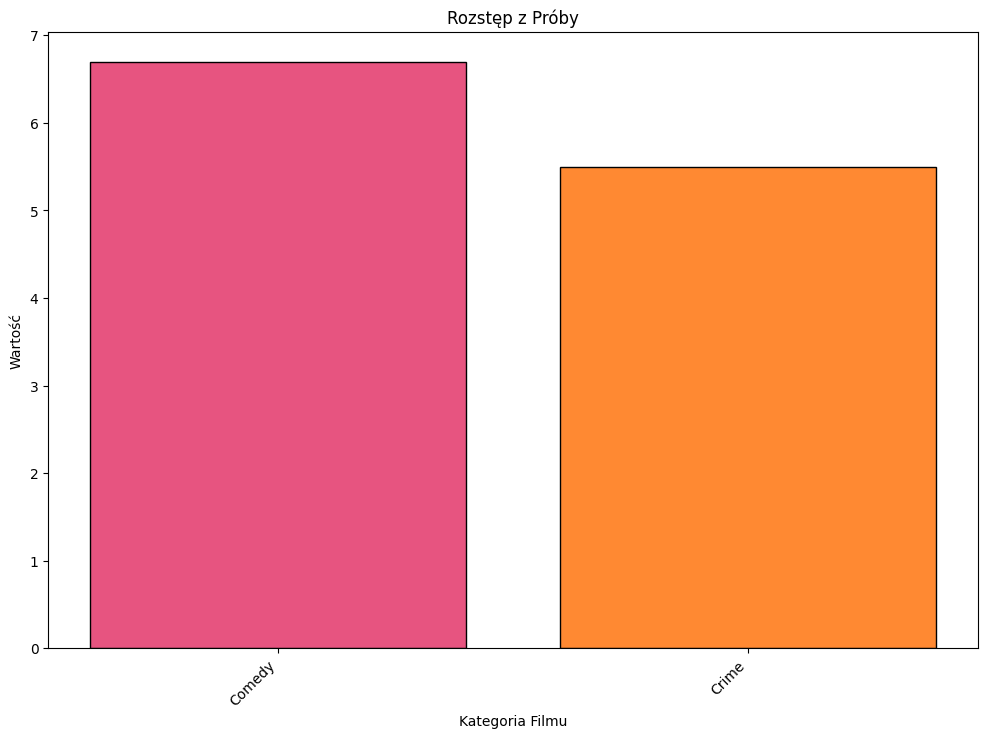

In [46]:
rozstep_z_proby = dane.groupby('genre')['score'].apply(lambda x: x.max() - x.min())

gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in rozstep_z_proby.index]

plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, rozstep_z_proby[selected_genres], color=palette, edgecolor = 'black')
plt.title('Rozstęp z Próby')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
print(comedy_scores.max()-comedy_scores.min())

6.699999999999999


In [48]:
print(crime_scores.max()-crime_scores.min())

5.5


### **ROZSTĘP MIĘDZYKWARTYLOWY**

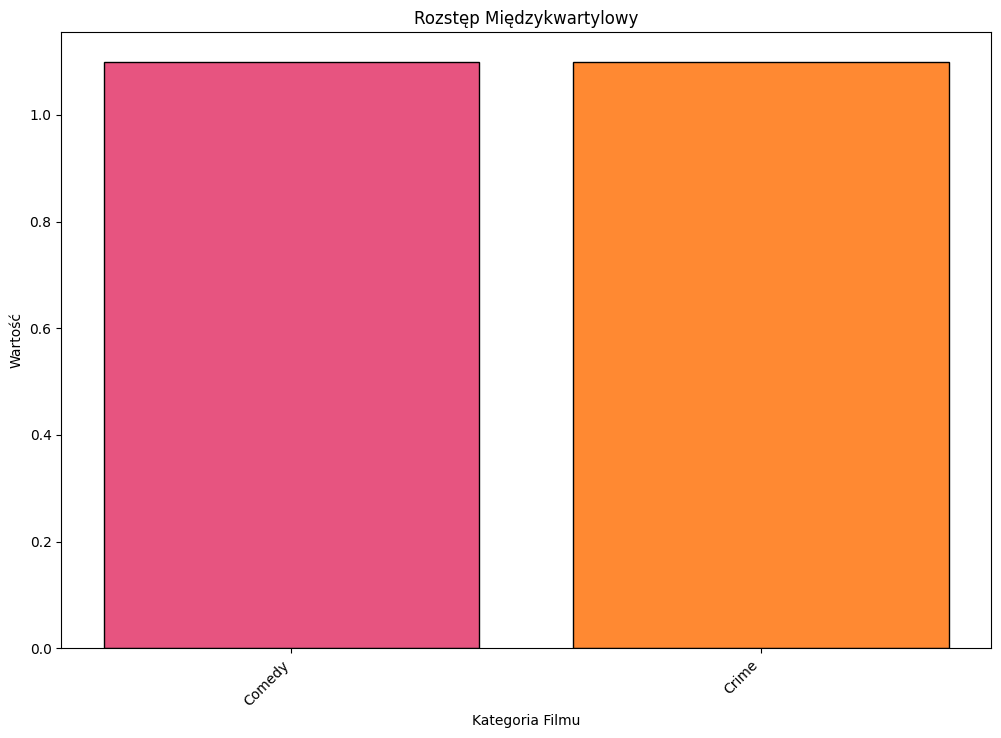

In [49]:
percentile_scores_by_genre_3 = dane.groupby('genre')['score'].apply(lambda x: np.percentile(x, 75))
percentile_scores_by_genre_1 = dane.groupby('genre')['score'].apply(lambda x: np.percentile(x, 25))
roztęp_kwartyle = percentile_scores_by_genre_3 - percentile_scores_by_genre_1

selected_genres = ['Comedy', 'Crime']
gatunki_pol = [tlumaczenia.get(gatunek, gatunek) for gatunek in roztęp_kwartyle.index]

plt.figure(figsize=(12, 8))
palette = ['#E75480', '#FF8932']
plt.bar(selected_genres, roztęp_kwartyle[selected_genres], color=palette, edgecolor = 'black')
plt.title('Rozstęp Międzykwartylowy')
plt.xlabel('Kategoria Filmu')
plt.ylabel('Wartość')
plt.xticks(rotation=45, ha='right')
plt.show()

In [50]:
print(np.percentile(comedy_scores, 75) - np.percentile(comedy_scores, 25))

1.0999999999999996


In [51]:
print(np.percentile(crime_scores, 75) - np.percentile(crime_scores, 25))

1.0999999999999996


### **WSPOLCZYNNIK ZMIENNOSCI**

In [145]:
print("Wspolczynnik zmiennosci dla komedii: ", np.std(comedy_scores)/np.mean(comedy_scores))

Wspolczynnik zmiennosci dla komedii:  0.15005148143251748


In [146]:
print("wspolczynnik zmiennosci dla kryminałów: ", np.std(crime_scores)/np.mean(crime_scores))

wspolczynnik zmiennosci dla kryminałów:  0.12494670033035313


### **ODCHYLENIE PRZECIĘTNE**

In [149]:
mean_deviation = (1/len(comedy_scores)) * sum(abs(x - np.mean(comedy_scores)) for x in comedy_scores)
print(mean_deviation)

0.7079438216706234


In [150]:
mean_deviation2 = (1/len(crime_scores)) * sum(abs(x - np.mean(crime_scores)) for x in crime_scores)
print(mean_deviation2)

0.6533564487660259


### **KURTOZA**

### **SKOŚNOŚĆ**

## **WIZUALIZACJA**

### **HISTOGRAM**

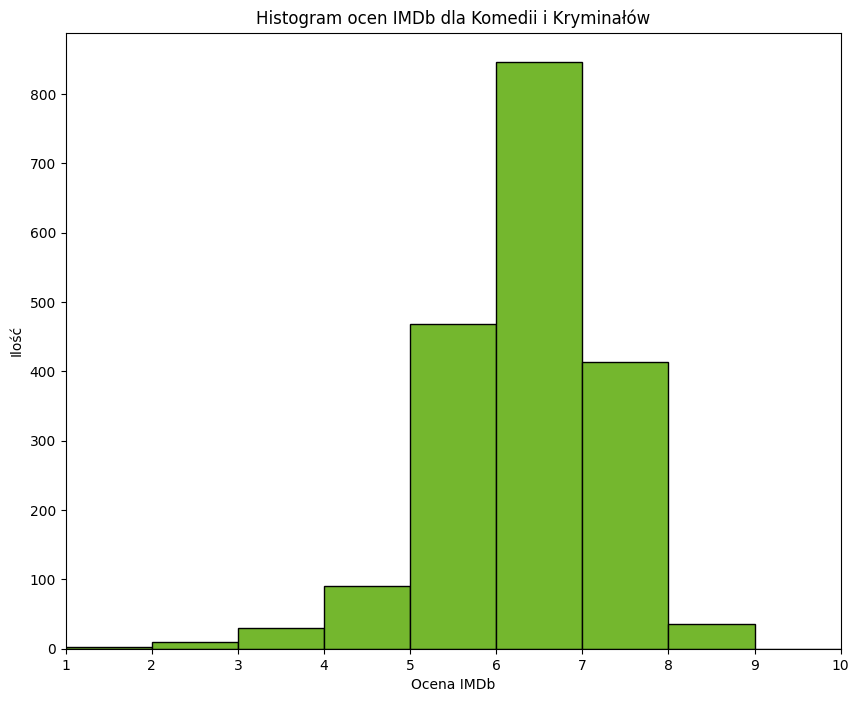

In [16]:
plt.figure(figsize=(10, 8))
comedy_crime_movies = dane[(dane['genre'].isin(['Comedy', 'Crime'])) & (dane['score'].notna())]['score']
plt.hist(comedy_crime_movies, bins=10, range=(0, 10), color = '#74B72E', edgecolor='black')
plt.xticks(range(0, 11, 1))
plt.title('Histogram ocen IMDb dla Komedii i Kryminałów')
plt.xlabel('Ocena IMDb')
plt.ylabel('Ilość')
plt.xlim(1,10)
plt.show()

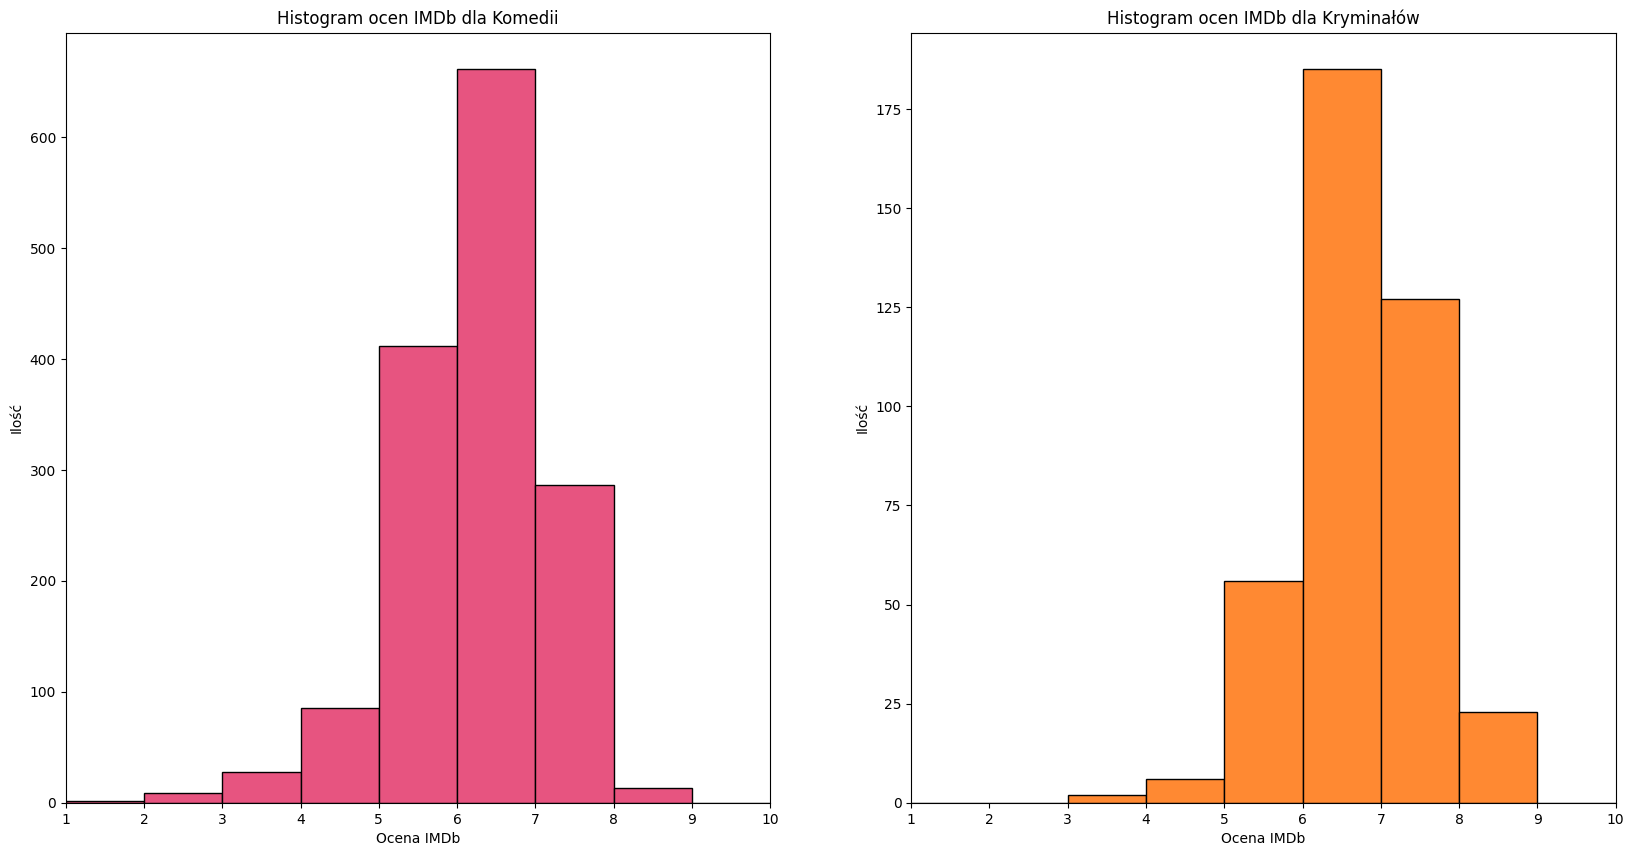

In [17]:
comedy_movies = dane[(dane['genre'] == 'Comedy') & dane['score']]['score']
crime_movies = dane[(dane['genre'] == 'Crime') & dane['score']]['score']

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(comedy_movies, bins=10, range=(0, 10), color='#E75480', edgecolor='black')
plt.xticks(range(0, 11, 1))
plt.xlim(1,10)
plt.title('Histogram ocen IMDb dla Komedii')
plt.xlabel('Ocena IMDb')
plt.ylabel('Ilość')

plt.subplot(1,2,2)
plt.hist(crime_movies, bins=10, range=(0, 10), color='#FF8932', edgecolor='black')
plt.xticks(range(0, 11, 1))
plt.title('Histogram ocen IMDb dla Kryminałów')
plt.xlim(1,10)
plt.xlabel('Ocena IMDb')
plt.ylabel('Ilość')

plt.show()


In [22]:
print(max(crime_scores))

8.9


### **GĘSTOŚĆ**

In [57]:
print('odchylenie standardowe komedia i kryminal', sta.stdev(comedy_crime_movies))
print('wartosc oczekiwana komedia i kryminal',comedy_crime_movies.mean() )

odchylenie standardowe komedia i kryminal 0.9327731465643908
wartosc oczekiwana komedia i kryminal 6.295672823218997


In [62]:
pkt = dane['score']

In [63]:
print('odchylenie standardowe WSZYSTKO', sta.stdev(pkt))
print('wartosc oczekiwana WSZYSTKO',pkt.mean() )

odchylenie standardowe WSZYSTKO 0.9627299572330241
wartosc oczekiwana WSZYSTKO 6.392455266555986


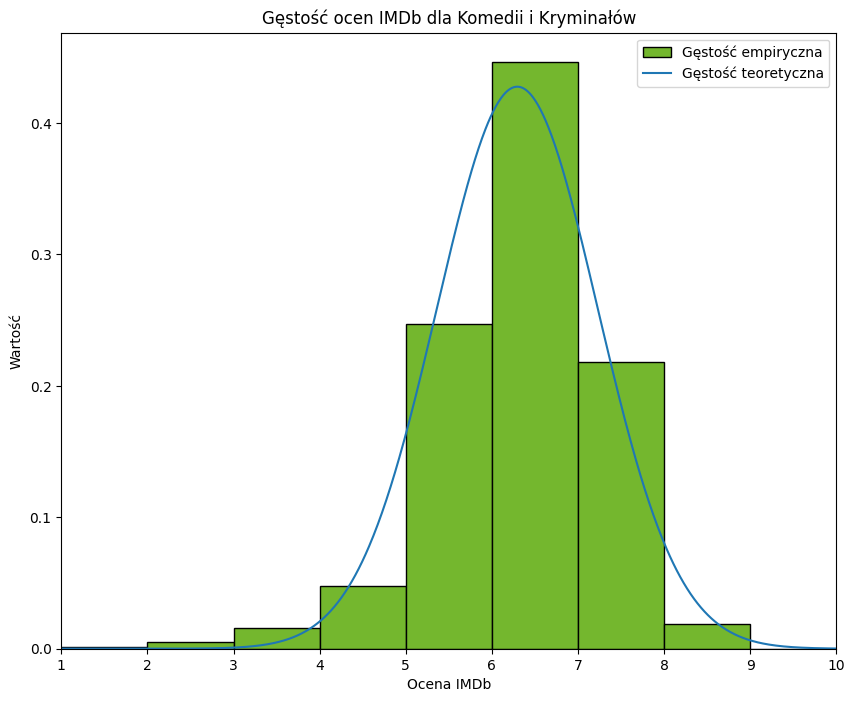

In [23]:
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(10,8))

#plt.subplot(1,2,1)
#plt.hist(scores, bins=10, range=(0, 10), color='#FFCC00', edgecolor='black', density=True, label = 'Gęstość empiryczna')
#plt.plot(x, norm.pdf(x, scores.mean(), sta.stdev(scores)), label = 'Gęstość teoretyczna')
#plt.xticks(range(0, 11, 1))
#plt.title('Gęstość ocen IMDb dla wszystkich filmów')
#plt.xlabel('Ocena IMDb')
#plt.ylabel('Wartość')
#plt.legend()

#plt.subplot(1,2,2)
plt.hist(comedy_crime_movies, bins=10, range=(0, 10), color='#74B72E', edgecolor='black', density=True, label = 'Gęstość empiryczna')
plt.plot(x, norm.pdf(x, comedy_crime_movies.mean(), sta.stdev(comedy_crime_movies)), label = 'Gęstość teoretyczna')
plt.xticks(range(0, 11, 1))
plt.xlim(1,10)
plt.title('Gęstość ocen IMDb dla Komedii i Kryminałów')
plt.xlabel('Ocena IMDb')
plt.ylabel('Wartość')
plt.legend()
plt.show()

In [24]:
print('odchylanie standardowe komedii: ', sta.stdev(comedy_scores))
print('odchylanie standardowe kryminału: ', sta.stdev(crime_scores))

odchylanie standardowe komedii:  0.9292356152860484
odchylanie standardowe kryminału:  0.8368456855218631


In [25]:
print('wartosc oczekiwana komedii: ', comedy_scores.mean())
print('wartosc oczekiwana kryminalu: ', crime_scores.mean())

wartosc oczekiwana komedii:  6.190708556149732
wartosc oczekiwana kryminalu:  6.68922305764411


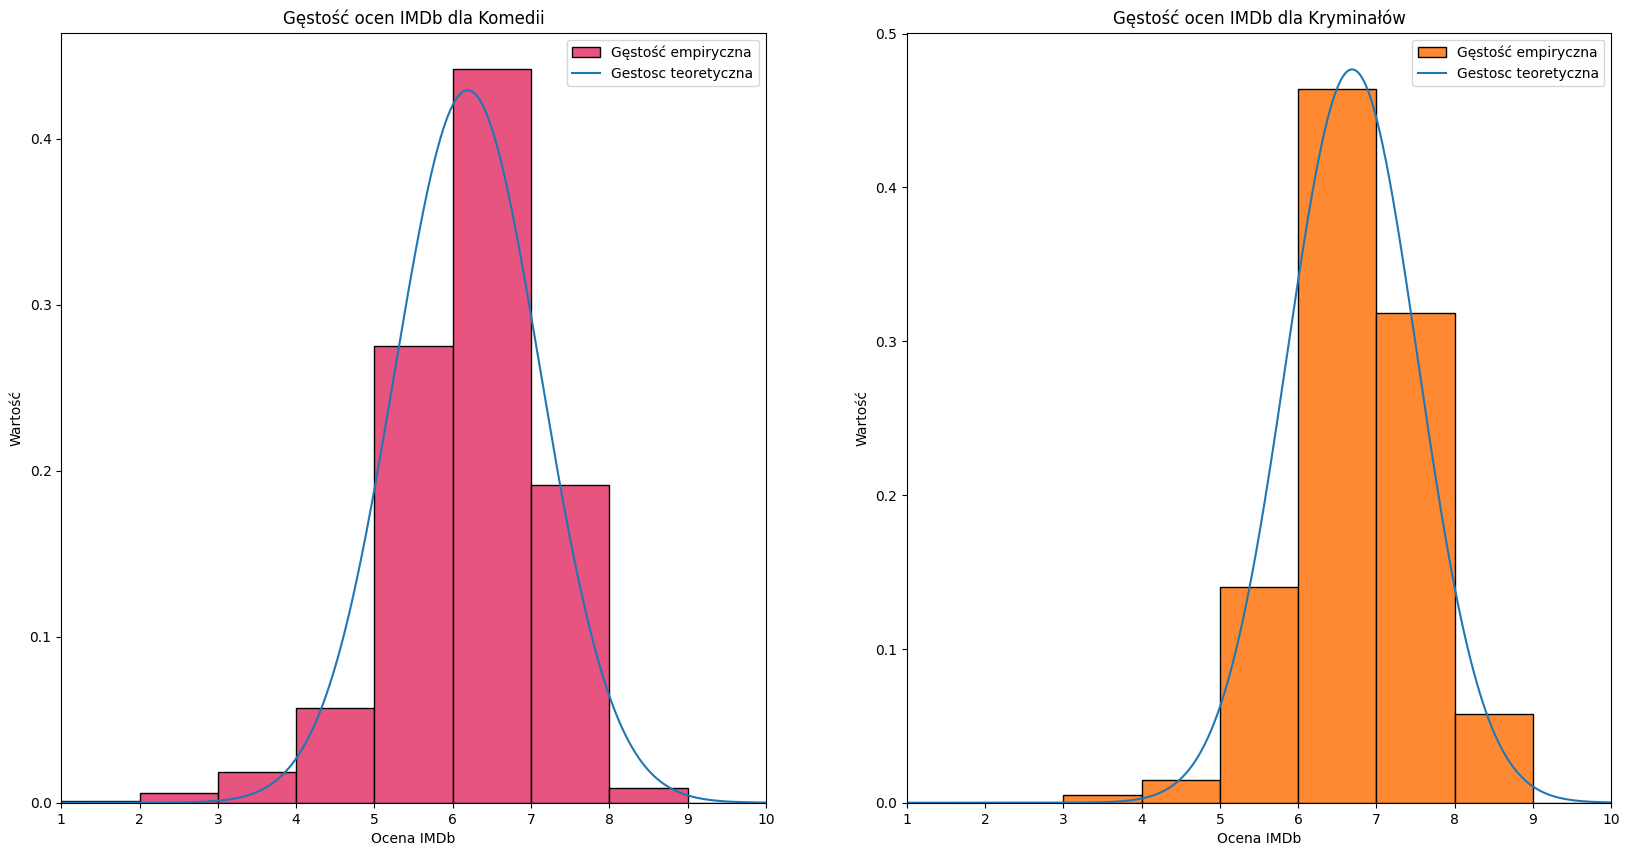

In [26]:

plt.figure(figsize=(20,10))

x= np.linspace(0, 10, 1000)

plt.subplot(1,2,1)
plt.hist(comedy_movies, bins=10, range=(0, 10), color='#E75480', edgecolor='black', density=True, label='Gęstość empiryczna')
plt.plot(x, norm.pdf(x, comedy_movies.mean(), sta.stdev(comedy_movies)), label = 'Gestosc teoretyczna')
plt.xticks(range(0, 11, 1))
plt.xlim(1,10)
plt.title('Gęstość ocen IMDb dla Komedii')
plt.xlabel('Ocena IMDb')
plt.legend()
plt.ylabel('Wartość')

plt.subplot(1,2,2)
plt.hist(crime_movies, bins=10, range=(0, 10), color='#FF8932', edgecolor='black', density=True, label='Gęstość empiryczna')
plt.plot(x, norm.pdf(x, crime_movies.mean(), sta.stdev(crime_movies)), label = 'Gestosc teoretyczna')
plt.xticks(range(0, 11, 1))
plt.xlim(1,10)
plt.title('Gęstość ocen IMDb dla Kryminałów')
plt.xlabel('Ocena IMDb')
plt.legend()
plt.ylabel('Wartość')

plt.show()


### **DYSTRYBUANTA**

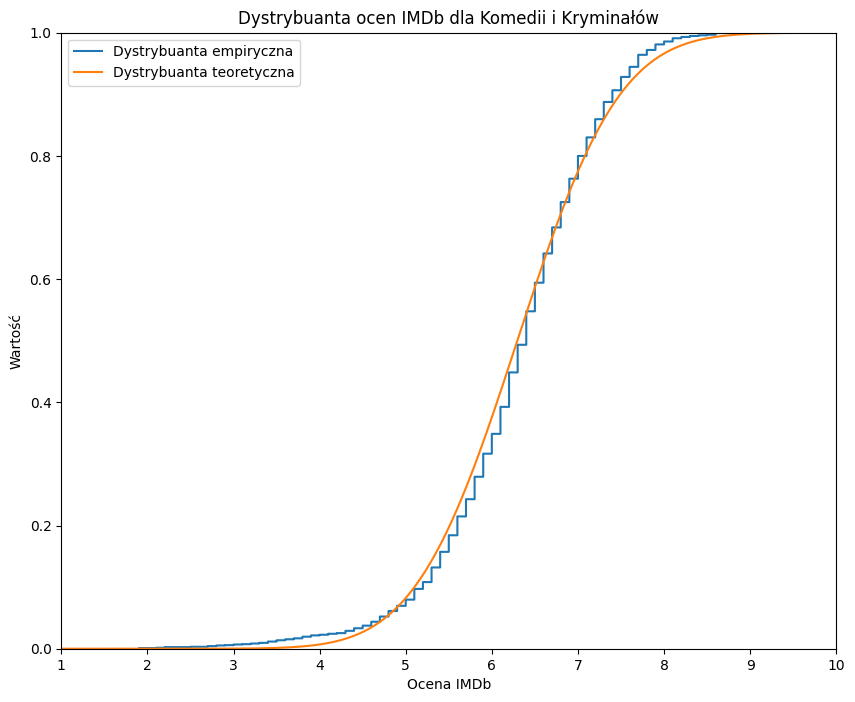

In [27]:
plt.figure(figsize=(10,8))
x = np.linspace(0, 10, 1000)
#comedy_crime_movies = dane[(dane['genre'].isin(['Comedy', 'Crime'])) & (dane['score'].notna())]['score']
sns.ecdfplot(data=comedy_crime_movies, label = 'Dystrybuanta empiryczna')
plt.plot(x,stats.norm.cdf(x, np.mean(comedy_crime_movies), np.std(comedy_crime_movies)), label = 'Dystrybuanta teoretyczna')
plt.xticks(range(0, 11, 1))
plt.xlim(1,10)
plt.title('Dystrybuanta ocen IMDb dla Komedii i Kryminałów')
plt.xlabel('Ocena IMDb')
plt.ylabel('Wartość')
plt.legend()
plt.show()

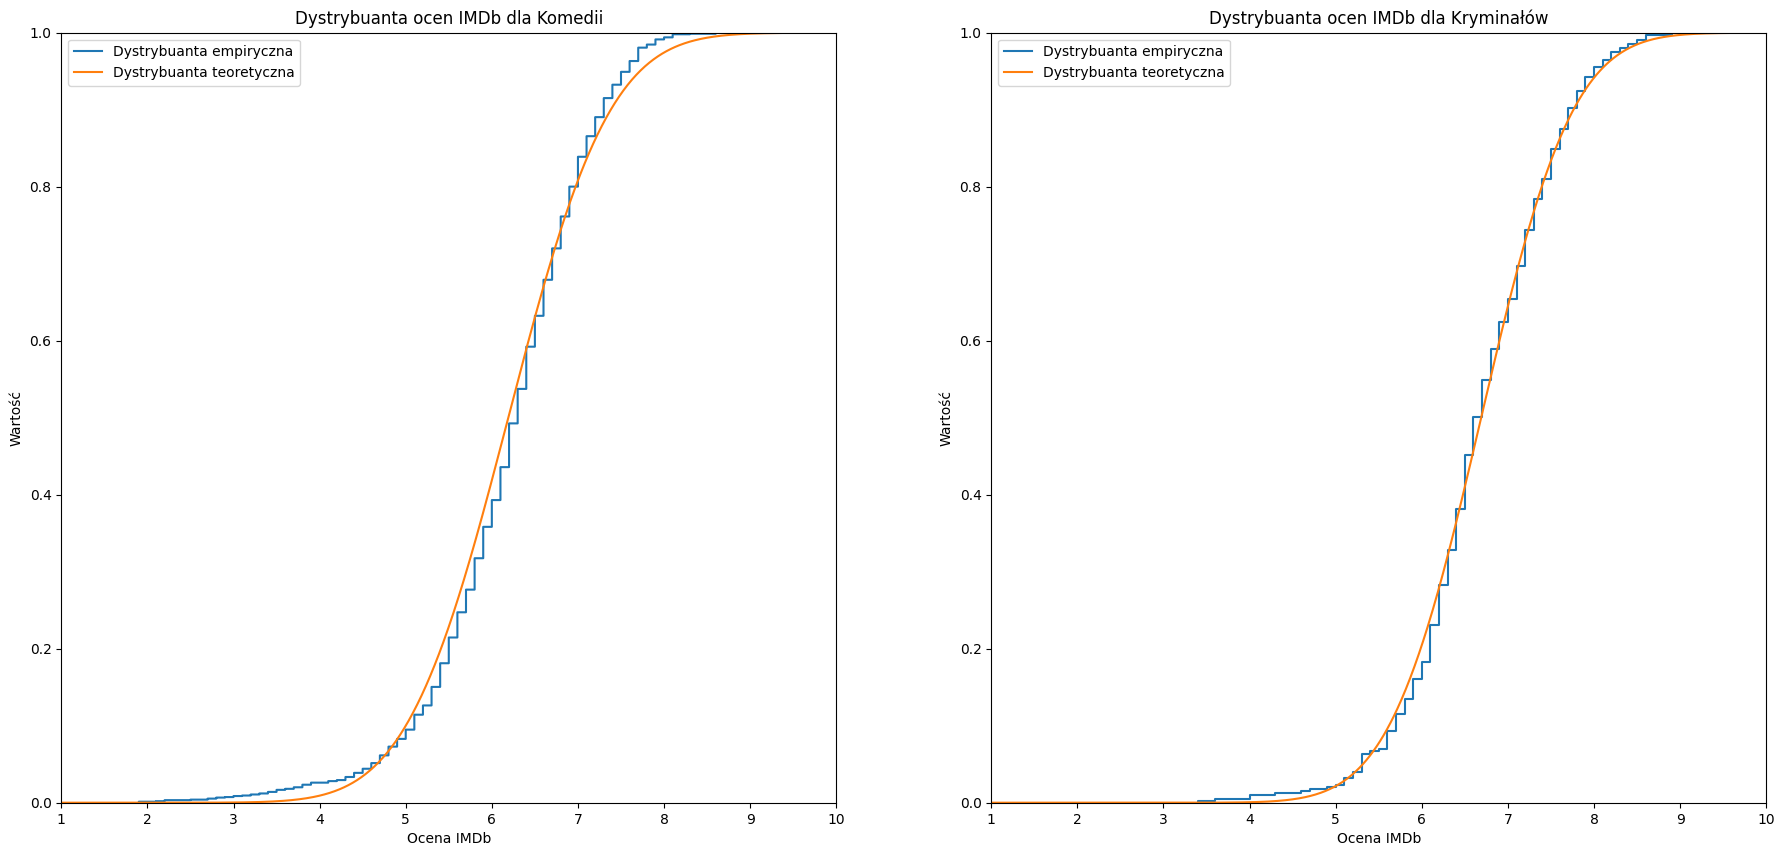

In [28]:
plt.figure(figsize=(22,10))

x= np.linspace(0, 10, 1000)

plt.subplot(1,2,1)
sns.ecdfplot(data=comedy_movies, label='Dystrybuanta empiryczna')
plt.plot(x,stats.norm.cdf(x, np.mean(comedy_movies), np.std(comedy_movies)), label = 'Dystrybuanta teoretyczna')
plt.xticks(range(0, 11, 1))
plt.xlim(1,10)
plt.title('Dystrybuanta ocen IMDb dla Komedii')
plt.xlabel('Ocena IMDb')
plt.legend()
plt.ylabel('Wartość')

plt.subplot(1,2,2)
sns.ecdfplot(data=crime_movies, label='Dystrybuanta empiryczna')
plt.plot(x,stats.norm.cdf(x, np.mean(crime_movies), np.std(crime_movies)), label = 'Dystrybuanta teoretyczna')
plt.xticks(range(0, 11, 1))
plt.xlim(1,10)
plt.title('Dystrybuanta ocen IMDb dla Kryminałów')
plt.xlabel('Ocena IMDb')
plt.legend()
plt.ylabel('Wartość')

plt.show()

### **QQPLOT**

### **WYKRES PUDEŁKOWY**

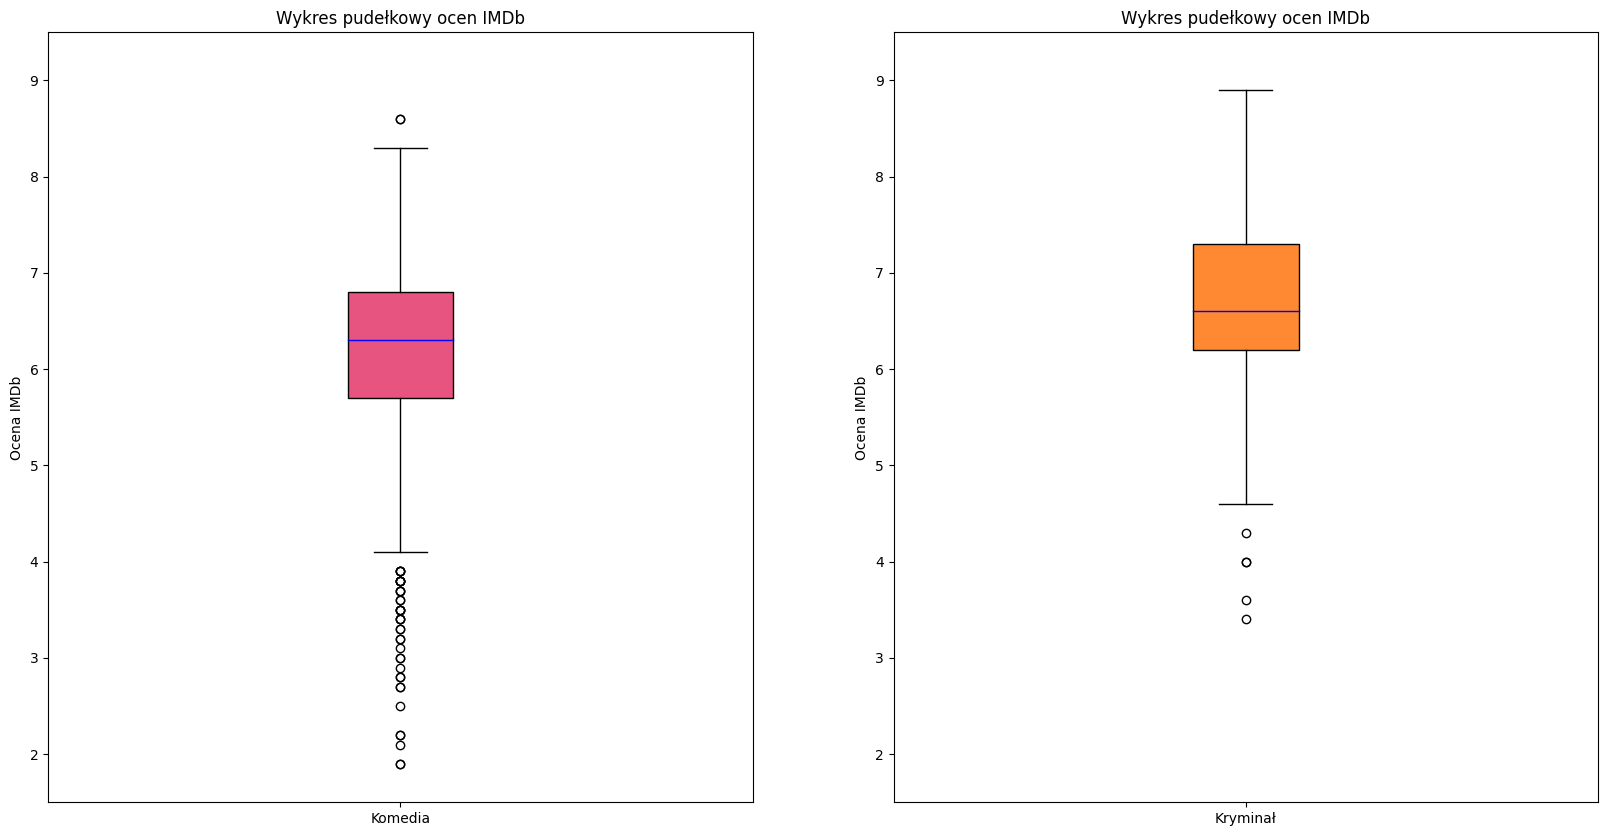

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

labels = ['Komedia', 'Kryminał']

colors = ['#E75480', '#FF8932']  

bplot1 = ax1.boxplot(comedy_movies,
                     vert=True,       
                     patch_artist=True,
                     labels=[labels[0]],
                     medianprops=dict(color='blue'))   
for patch, color in zip(bplot1['boxes'], [colors[0]]):
    patch.set_facecolor(color)

bplot2 = ax2.boxplot(crime_movies,
                     vert=True,        
                     patch_artist=True,
                     labels=[labels[1]],
                     medianprops=dict(color='blue'))  
for patch, color in zip(bplot2['boxes'], [colors[1]]):
    patch.set_facecolor(color)


ax1.set_title('Wykres pudełkowy ocen IMDb')
ax2.set_title('Wykres pudełkowy ocen IMDb')
ax2.set_ylabel('Ocena IMDb')
ax1.set_ylabel('Ocena IMDb')
ax1.set_ylim(1.5, 9.5)
ax2.set_ylim(1.5, 9.5)
plt.show()